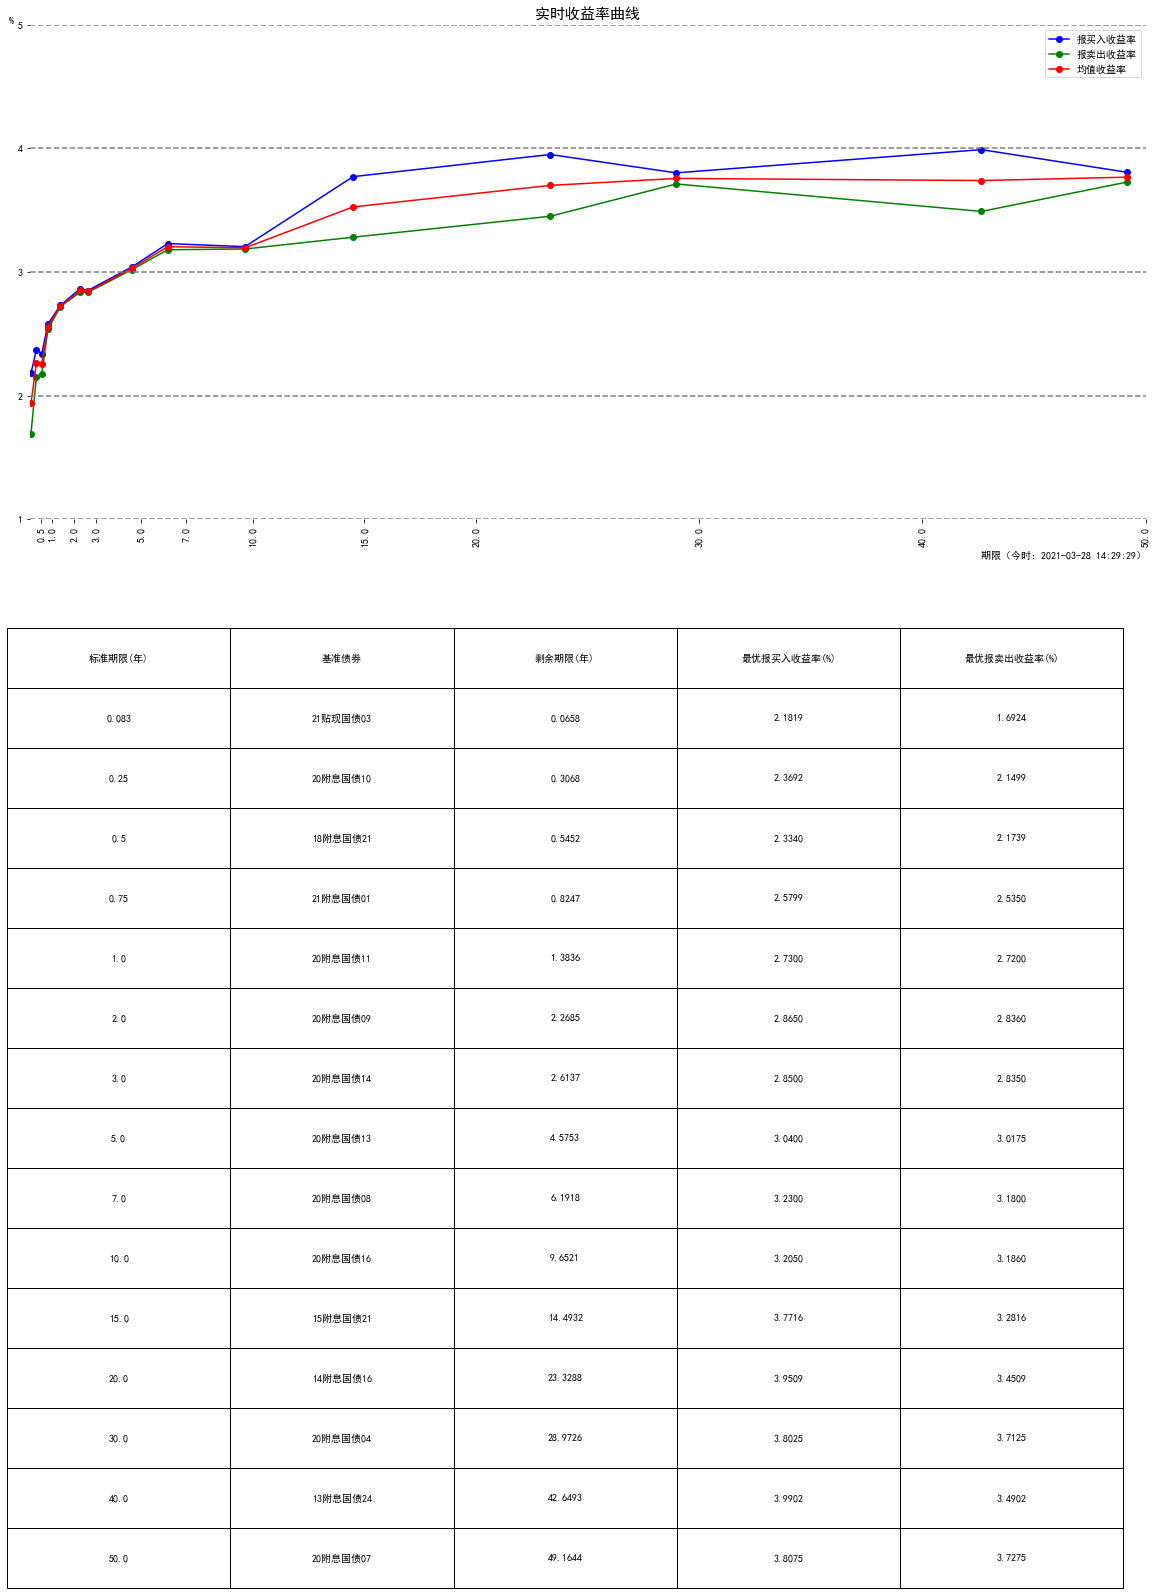

In [7]:
import requests
import json
import time
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']      
plt.rcParams['axes.unicode_minus'] = False

now = time.time()
local_time = time.localtime(now)
today = time.strftime('%Y-%m-%d %H:%M:%S', local_time)

url = "http://www.chinamoney.com.cn/ags/ms/cm-u-bk-currency/RtimeYldCurv?lang=CN"

res = requests.get(url)
data = json.loads(res.text)

updateTime = data['data']['time']
stterms = data['data']['stterms'][0]
# dataterms = data['data']['dataterms'][0]
records = data['records']

x = []
yi = []
yo = []
ya = []
col_labels = ['标准期限(年)','基准债券','剩余期限(年)','最优报买入收益率(%)','最优报卖出收益率(%)']
table_vals = []
for record in records:
    x.append(record['remainingMaturity'])
    yi.append(record['buyYield'])
    yo.append(record['sellYield'])
    ya.append(record['avgYield'])
    table_val = [record['tl'],record['name'],record['remainingMaturityStr'],record['buyYieldStr'],record['sellYieldStr']]
    table_vals.append(table_val)


fig=plt.figure(figsize=(20,20))
ax1 = plt.subplot(211)

plt.plot(x,yi,color='b',markerfacecolor='blue',marker='o',label="报买入收益率")    
plt.plot(x,yo,color='g',markerfacecolor='green',marker='o',label="报卖出收益率")    
plt.plot(x,ya,color='r',markerfacecolor='red',marker='o',label="均值收益率")    

plt.plot([0,50.0],[1.00,1.00],color="grey",linestyle="--")     
plt.plot([0,50.0],[2.00,2.00],color="grey",linestyle="--")     
plt.plot([0,50.0],[3.00,3.00],color="grey",linestyle="--")     
plt.plot([0,50.0],[4.00,4.00],color="grey",linestyle="--")     
plt.plot([0,50.0],[5.00,5.00],color="grey",linestyle="--")     


plt.title("实时收益率曲线",fontsize=15)
plt.xlabel("期限（今时："+today+"）", loc = "right")
plt.ylabel("%", loc = "top", rotation = 0)

ax = plt.gca()
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('none')

plt.xlim(0,50)
plt.ylim(1,5)
plt.xticks(stterms,rotation=90) 
plt.yticks([1.00,2.00,3.00,4.00,5.00]) 
# fig.autofmt_xdate()
plt.legend()


ax2 = plt.subplot(212,frameon=False)
plt.xticks([])
plt.yticks([])
table = plt.table(cellText=table_vals,colLabels=col_labels,loc="best",cellLoc="center")
table.set_fontsize(10)
table.scale(1,5)


plt.show()